# Education Actual Operating Cost Per Student  from Oregon from 1997-2000

## Part 1: EDA (Exploratory Data Analysis)

This data is obtained from "Education Actual Operating Cost Per Student" on datahub.io, link

https://datahub.io/JohnSnowLabs/education-actual-operating-cost-per-student

Data retrieved on 5/18/2018

Note: Give proper attribution


The web page has information on how to get the data into pandas.

In [1]:
import datapackage
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data_url = 'https://datahub.io/JohnSnowLabs/education-actual-operating-cost-per-student/datapackage.json'


In [2]:
package = datapackage.Package(data_url)

The following are trying to figure out what the "datapackage" returns and what the methods that can be used are.

In [3]:
package


In [4]:
package.resource_names

['validation_report',
 'education-actual-operating-cost-per-student-csv_csv',
 'education-actual-operating-cost-per-student-csv_csv_preview',
 'education-actual-operating-cost-per-student-csv_json',
 'education-actual-operating-cost-per-student_zip',
 'education-actual-operating-cost-per-student-csv']

In [5]:
package.resources

In [6]:
package.resources[4].__dir__()

['_Resource__current_descriptor',
 '_Resource__next_descriptor',
 '_Resource__base_path',
 '_Resource__package',
 '_Resource__storage',
 '_Resource__relations',
 '_Resource__strict',
 '_Resource__table',
 '_Resource__errors',
 '_Resource__source_inspection',
 '_Resource__profile',
 '__module__',
 '__init__',
 'valid',
 'errors',
 'profile',
 'descriptor',
 'name',
 'inline',
 'local',
 'remote',
 'multipart',
 'tabular',
 'source',
 'headers',
 'schema',
 'iter',
 'read',
 'check_relations',
 'raw_iter',
 'raw_read',
 'infer',
 'commit',
 'save',
 '_Resource__build',
 '_Resource__get_table',
 '_Resource__get_relations',
 'table',
 'data',
 '__dict__',
 '__weakref__',
 '__doc__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [7]:
print([res.__dir__ for res in package.resources])

[<built-in method __dir__ of Resource object at 0x00000178A7B1D668>, <built-in method __dir__ of Resource object at 0x00000178AB3C7EF0>, <built-in method __dir__ of Resource object at 0x00000178AB474FD0>, <built-in method __dir__ of Resource object at 0x00000178AB47D2E8>, <built-in method __dir__ of Resource object at 0x00000178AB4867F0>, <built-in method __dir__ of Resource object at 0x00000178AB492C50>]


This is how the package instructs to read the csv. However, both the csvs seem to contain the same data (since shape is same and headers are the same). Only the last read data is being retained.

In [8]:
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print ("Read ",{resource.descriptor['path']}, data.shape)
        print(data.head())
        
        

Read  {'https://pkgstore.datahub.io/JohnSnowLabs/education-actual-operating-cost-per-student/education-actual-operating-cost-per-student-csv_csv/data/05a04c684b9da44cc4c4b67131b7c7f5/education-actual-operating-cost-per-student-csv_csv.csv'} (2205, 10)
   District_ID County_Name  Operating_Cost_Per_Student     District_Number  \
0         1894       BAKER                     7053.37  BAKER SCH DIST 05J   
1         1894       BAKER                     7098.46  BAKER SCH DIST 05J   
2         1894       BAKER                     7329.99         Baker SD 5J   
3         1894       BAKER                     7025.58         Baker SD 5J   
4         1894       BAKER                     7475.36         Baker SD 5J   

  School_Year  Student_Count  State_Student_Count  Total_Operating_Cost  \
0  1999-07-01         2317.0               543138           16342661.74   
1  2000-07-01         2343.0               544245           16631694.66   
2  2001-07-01         2199.0               549757     

In [9]:
data.head()

,District_ID,County_Name,Operating_Cost_Per_Student,District_Number,School_Year,Student_Count,State_Student_Count,Total_Operating_Cost,State_Operating_Cost,State_Operating_Cost_Per_Student
0,1894,BAKER,7053.37,BAKER SCH DIST 05J,1999-07-01,2317.0,543138,16342661.74,3.556942e+09,6548.87
1,1894,BAKER,7098.46,BAKER SCH DIST 05J,2000-07-01,2343.0,544245,16631694.66,3.796207e+09,6975.18
2,1894,BAKER,7329.99,Baker SD 5J,2001-07-01,2199.0,549757,16118655.82,3.966872e+09,7215.68
3,1894,BAKER,7025.58,Baker SD 5J,2002-07-01,2151.0,552161,15112028.86,3.889552e+09,7044.24
4,1894,BAKER,7475.36,Baker SD 5J,2003-07-01,2115.0,549169,15810377.82,3.970644e+09,7230.28


There are 200 schools (indicated by District\_ID and the corresponding name in District\_Number) reported and 13 years of data for each school. District\_ID is a number, and is more consistent than the school name in District\Number. For example, 


In [10]:
data[data["District_ID"]==2113]["District_Number"].unique()

array(['ADRIAN SCH DIST 61', 'Adrian SD 61'], dtype=object)

In [11]:
len(data["District_ID"].unique())

200

In [12]:
data["School_Year"].unique()

array(['1999-07-01', '2000-07-01', '2001-07-01', '2002-07-01',
       '2003-07-01', '2004-07-01', '2005-07-01', '2006-07-01',
       '2007-07-01', '2008-07-01', '2009-07-01', '1997-07-01',
       '1998-07-01'], dtype=object)

First, lets try to see how big the school districts are, over the reporting period.

In [13]:
district_group = data.groupby("District_ID")
district_avg_students = district_group["Student_Count"].mean().sort_values()
district_avg_students

District_ID
2021        3.272727
2051        4.818182
2222        5.454545
2017        9.636364
2062        9.818182
2109       10.090909
1979       10.166667
2018       12.454545
2019       12.909091
2016       13.111111
2020       13.636364
2022       16.454545
2063       16.636364
2115       17.727273
2052       21.454545
2047       27.727273
2210       50.909091
2012       55.818182
2010       60.636364
2011       60.818182
2247       69.000000
1896       70.272727
2249       70.461538
2111       71.181818
2015       76.909091
2114       83.090909
2023       84.909091
1895       92.454545
2107       92.454545
2248       92.727273
            ...     
1929     5167.636364
2054     5678.545455
2088     5686.545455
2055     5790.636364
2241     5837.454545
2256     5957.272727
2097     6068.000000
2185     6364.000000
1977     6408.454545
2057     6611.363636
1991     6639.909091
1923     6953.076923
1901     6999.272727
1928     7936.000000
1922     8022.909091
2100     8504.076923
2

Oops, one of the schools has NaN for the number of students. We should explore this further.

In [14]:
data[data["District_ID"]==2112]


,District_ID,County_Name,Operating_Cost_Per_Student,District_Number,School_Year,Student_Count,State_Student_Count,Total_Operating_Cost,State_Operating_Cost,State_Operating_Cost_Per_Student
1380,2112,MALHEUR,NaN,Malheur County SD 51,1999-07-01,NaN,543138,15134.00,3.556942e+09,6548.87
1381,2112,MALHEUR,NaN,Malheur County SD 51,2000-07-01,NaN,544245,18056.00,3.796207e+09,6975.18
1382,2112,MALHEUR,NaN,Malheur County SD 51,2001-07-01,NaN,549757,40367.00,3.966872e+09,7215.68
1383,2112,MALHEUR,NaN,Malheur County SD 51,2002-07-01,NaN,552161,15021.96,3.889552e+09,7044.24
1384,2112,MALHEUR,NaN,Malheur County SD 51,2003-07-01,NaN,549169,28592.00,3.970644e+09,7230.28
1385,2112,MALHEUR,NaN,Malheur County SD 51,2004-07-01,NaN,549793,10138.62,4.198535e+09,7636.57
1386,2112,MALHEUR,NaN,Malheur County SD 51,2005-07-01,NaN,555146,12238.13,4.513950e+09,8131.11
1387,2112,MALHEUR,NaN,Malheur County SD 51,2006-07-01,NaN,558366,79985.00,4.768934e+09,8540.87
1388,2112,MALHEUR,NaN,Malheur County SD 51,2007-07-01,NaN,561354,10715.50,5.144637e+09,9164.69
1389,2112,MALHEUR,NaN,Malheur County SD 51,2008-07-01,NaN,559271,14473.00,5.248233e+09,9384.06


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 10 columns):
District_ID                         2205 non-null int64
County_Name                         2205 non-null object
Operating_Cost_Per_Student          2190 non-null float64
District_Number                     2205 non-null object
School_Year                         2205 non-null object
Student_Count                       2190 non-null float64
State_Student_Count                 2205 non-null int64
Total_Operating_Cost                2205 non-null float64
State_Operating_Cost                2205 non-null float64
State_Operating_Cost_Per_Student    2205 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 172.3+ KB


In [16]:
data[data.isnull().any(axis=1)]

,District_ID,County_Name,Operating_Cost_Per_Student,District_Number,School_Year,Student_Count,State_Student_Count,Total_Operating_Cost,State_Operating_Cost,State_Operating_Cost_Per_Student
451,1979,DESCHUTES,NaN,BROTHERS SCH DIST 15,2005-07-01,NaN,555146,162657.73,4.513950e+09,8131.11
716,2016,HARNEY,NaN,Pine Creek SD 5,2008-07-01,NaN,559271,85465.69,5.248233e+09,9384.06
717,2016,HARNEY,NaN,Pine Creek SD 5,2009-07-01,NaN,556836,95645.38,5.162739e+09,9271.56
1380,2112,MALHEUR,NaN,Malheur County SD 51,1999-07-01,NaN,543138,15134.00,3.556942e+09,6548.87
1381,2112,MALHEUR,NaN,Malheur County SD 51,2000-07-01,NaN,544245,18056.00,3.796207e+09,6975.18
1382,2112,MALHEUR,NaN,Malheur County SD 51,2001-07-01,NaN,549757,40367.00,3.966872e+09,7215.68
1383,2112,MALHEUR,NaN,Malheur County SD 51,2002-07-01,NaN,552161,15021.96,3.889552e+09,7044.24
1384,2112,MALHEUR,NaN,Malheur County SD 51,2003-07-01,NaN,549169,28592.00,3.970644e+09,7230.28
1385,2112,MALHEUR,NaN,Malheur County SD 51,2004-07-01,NaN,549793,10138.62,4.198535e+09,7636.57
1386,2112,MALHEUR,NaN,Malheur County SD 51,2005-07-01,NaN,555146,12238.13,4.513950e+09,8131.11


In [17]:
len(data[data.isnull().any(axis=1)])

15

In [18]:
data[data.isnull().any(axis=1)]["District_Number"].unique()

array(['BROTHERS SCH DIST 15', 'Pine Creek SD 5', 'Malheur County SD 51',
       'North Wasco SD 21'], dtype=object)

Its not just one school that has missing data, 4 schools have missing data, over 15 rows. Since there is no other way for us to retrieve the data, dropping the missing data for now.

In [19]:
clean_data = data.dropna()
clean_data.shape

(2190, 10)

Looking through the average student count again, there are schools with 3 or 4 students on average. The District_ID for the school with 3 students is "2021". The column indicating "District_Number" is actually the name of the school, "Double O". Some google searches, lead me to 
https://www.schooldigger.com/go/OR/schools/0429000372/school.aspx

which indicates that the student population has been ranging from 2 to 4 from 2009-2016. Even though the schooldigger.com information does not cover the same time period, this gives reasonable confidence that the data we have is correct. 

In [20]:
clean_data[clean_data["District_ID"]==2021]

,District_ID,County_Name,Operating_Cost_Per_Student,District_Number,School_Year,Student_Count,State_Student_Count,Total_Operating_Cost,State_Operating_Cost,State_Operating_Cost_Per_Student
762,2021,HARNEY,23115.00,Double O SD 28,1999-07-01,4.0,543138,92460.00,3.556942e+09,6548.87
763,2021,HARNEY,27522.21,Double O SD 28,2000-07-01,4.0,544245,110088.83,3.796207e+09,6975.18
764,2021,HARNEY,30264.68,Double O SD 28,2001-07-01,4.0,549757,121058.73,3.966872e+09,7215.68
765,2021,HARNEY,25896.27,Double O SD 28,2002-07-01,6.0,552161,155377.62,3.889552e+09,7044.24
766,2021,HARNEY,31900.96,Double O SD 28,2003-07-01,4.0,549169,127603.85,3.970644e+09,7230.28
767,2021,HARNEY,29826.82,Double O SD 28,2004-07-01,5.0,549793,149134.09,4.198535e+09,7636.57
768,2021,HARNEY,120444.65,Double O SD 28,2005-07-01,1.0,555146,120444.65,4.513950e+09,8131.11
769,2021,HARNEY,61425.21,Double O SD 28,2006-07-01,2.0,558366,122850.41,4.768934e+09,8540.87
770,2021,HARNEY,125242.63,Double O SD 28,2007-07-01,1.0,561354,125242.63,5.144637e+09,9164.69
771,2021,HARNEY,40751.10,Double O SD 28,2008-07-01,3.0,559271,122253.29,5.248233e+09,9384.06


In [21]:
clean_data[(clean_data["County_Name"]=="HARNEY") & (clean_data["Student_Count"]<100)]["District_Number"].unique()

array(['CRANE SCH DIST 4', 'Harney County SD 4', 'PINE CREEK SCH DIST 5',
       'Pine Creek SD 5', 'Diamond SD 7', 'SUNTEX SCH DIST 10',
       'Suntex SD 10', 'DREWSEY SCH DIST 013', 'Drewsey SD 13',
       'Frenchglen SD 16', 'Double O SD 28', 'South Harney SD 33',
       'CRANE UHS DIST 1J', 'Harney County Union High SD 1J'],
      dtype=object)

Looking at the County_Name "HARNEY", 9 schools have less than 100 students on average. A google search reveals that Harney is a Education Serrvice District (ESD) has been created to service multiple small schools. This includes Crane Union High School the only high school which services 7500 square miles. It is a boarding school which had 53 students in 2008 according to wikipedia. This shows that there are quite a few schools with less than 100 students. This dataset shows that there are 31 schools which have had less than 100 students average during the reporting period.

In [22]:
district_avg_students[district_avg_students<100].count()

31

Lets now group by "School\_Year", and see if the data is OK or not. The "State\_" numbers should be the same for all schools for each year. That is, the number of unique elements should be 1 always.

In [23]:
year_group = clean_data.groupby("School_Year")
list_of_series = []
state_list = [ "State_Student_Count", "State_Operating_Cost","State_Operating_Cost_Per_Student"]
for col in state_list:
    # print(col, ":\n", year_group[col].unique())
    list_of_series.append(year_group[col].unique())
print(list_of_series) 

[School_Year
1997-07-01    [539105]
1998-07-01    [540605]
1999-07-01    [543138]
2000-07-01    [544245]
2001-07-01    [549757]
2002-07-01    [552161]
2003-07-01    [549169]
2004-07-01    [549793]
2005-07-01    [555146]
2006-07-01    [558366]
2007-07-01    [561354]
2008-07-01    [559271]
2009-07-01    [556836]
Name: State_Student_Count, dtype: object, School_Year
1997-07-01     [948447366.8]
1998-07-01    [1012656852.0]
1999-07-01    [3556941887.0]
2000-07-01    [3796207419.0]
2001-07-01    [3966871635.0]
2002-07-01    [3889552066.0]
2003-07-01    [3970643658.0]
2004-07-01    [4198534677.0]
2005-07-01    [4513950429.0]
2006-07-01    [4768933787.0]
2007-07-01    [5144636555.0]
2008-07-01    [5248233458.0]
2009-07-01    [5162739221.0]
Name: State_Operating_Cost, dtype: object, School_Year
1997-07-01     [1759.3]
1998-07-01    [1873.19]
1999-07-01    [6548.87]
2000-07-01    [6975.18]
2001-07-01    [7215.68]
2002-07-01    [7044.24]
2003-07-01    [7230.28]
2004-07-01    [7636.57]
2005-07-01

So, clean\_data seems OK, no more inconsistencies found, lets plot some data to see trends. The unique() operation above returned a list of a single element, so using "applymap" to make it a regular number.

In [24]:
state_spending = pd.DataFrame(list_of_series).T
state_spending = state_spending.applymap(lambda x:x[0])
state_spending

,State_Student_Count,State_Operating_Cost,State_Operating_Cost_Per_Student
School_Year,,,
1997-07-01,539105,9.484474e+08,1759.30
1998-07-01,540605,1.012657e+09,1873.19
1999-07-01,543138,3.556942e+09,6548.87
2000-07-01,544245,3.796207e+09,6975.18
2001-07-01,549757,3.966872e+09,7215.68
2002-07-01,552161,3.889552e+09,7044.24
2003-07-01,549169,3.970644e+09,7230.28
2004-07-01,549793,4.198535e+09,7636.57
2005-07-01,555146,4.513950e+09,8131.11


In [25]:
# Code snippet to get markers available, only check that the number of markers available is 
# more than the number of plots needed
from matplotlib.lines import Line2D
markers = []
for m in Line2D.markers:
    try:
        if len(m) == 1 and m != ' ':
            markers.append(m)
    except TypeError:
        pass
len(markers)

25

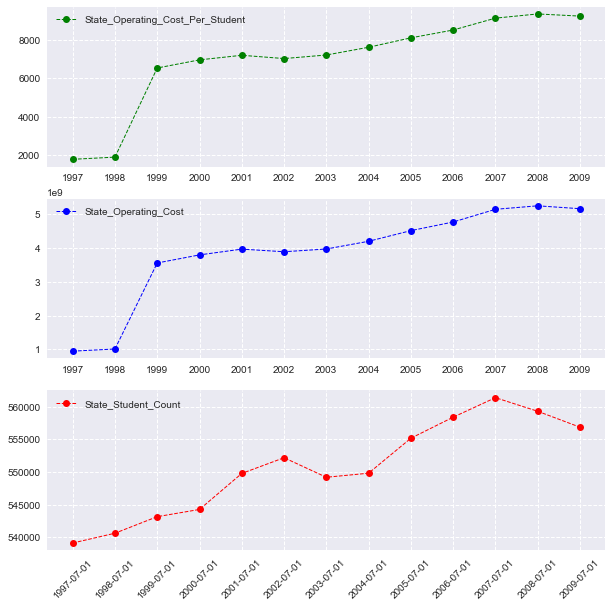

In [26]:
xscale = range(1997,2010)
colors = ["red","blue","green"]
plt.figure(figsize=(10,10))
visibility=True #Only plot x for the first one
sns.set()
for i, col in enumerate(state_list):
    plt.subplot(3,1,3-i)
    plt.plot(xscale,state_spending[col],linewidth=1,linestyle="--", 
             label="{0}".format(col), marker="o", color=colors[i] )
    if visibility:
        plt.xticks(xscale, state_spending.index, rotation=45)
    else:
        plt.xticks(xscale)
    visibility = False
    plt.legend()
    plt.grid(linestyle="--")
    

plt.show()

## Operating cost per Student vs Student Count per district
The data had to be divided up into tiny school districts with \<100 students, and big school districts with \>30000 students, so that the trends can be seen. In tiny school districts, the cost per student is very high.

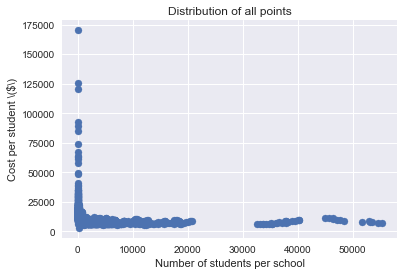

In [27]:
plt.scatter(clean_data["Student_Count"],clean_data["Operating_Cost_Per_Student"])
plt.xlabel("Number of students per school")
plt.ylabel("Cost per student \($\)")
plt.title("Distribution of all points")
plt.show()

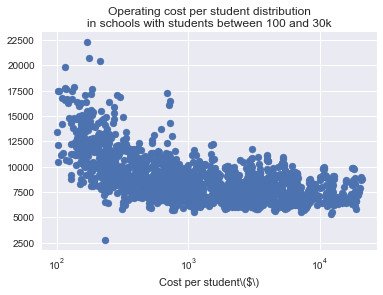

In [28]:
non_small_schools = clean_data[(clean_data["Student_Count"]>100) &(clean_data["Student_Count"]<30000)]
ax = plt.gca()
plt.scatter(non_small_schools["Student_Count"],non_small_schools["Operating_Cost_Per_Student"])
ax.set_xscale('log')
plt.xlabel("Number of students per school, log scale")
plt.xlabel("Cost per student\($\)")
plt.title("Operating cost per student distribution\nin schools with students between 100 and 30k")
plt.show()

In [29]:
non_small_schools["Student_Count"].max()

20734.0

In [30]:
big_schools =  clean_data[clean_data["Student_Count"]>30000]

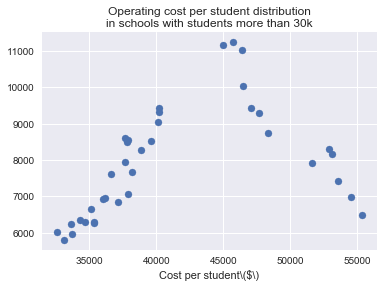

In [31]:
plt.scatter(big_schools["Student_Count"],big_schools["Operating_Cost_Per_Student"])
plt.xlabel("Number of students per school")
plt.xlabel("Cost per student\($\)")
plt.title("Operating cost per student distribution\nin schools with students more than 30k")
plt.show()

In [32]:
big_schools["District_ID"].unique()

array([2142, 2180, 2243], dtype=int64)

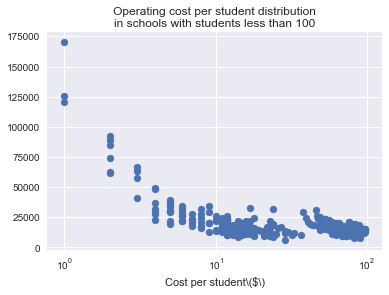

In [33]:
tiny_schools =  clean_data[clean_data["Student_Count"]<100]
ax = plt.gca()
ax.set_xscale('log')
plt.scatter(tiny_schools["Student_Count"],tiny_schools["Operating_Cost_Per_Student"])
plt.xlabel("Number of students per school, log scale")
plt.xlabel("Cost per student\($\)")
plt.title("Operating cost per student distribution\nin schools with students less than 100")
plt.show()

In [34]:
tiny_schools["District_ID"].unique()

array([1895, 1896, 2063, 1979, 2010, 2011, 2012, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023, 2047, 2051, 2052, 2060, 2062, 2107,
       2109, 2111, 2114, 2115, 2210, 2222, 2247, 2248, 2249], dtype=int64)

In [35]:
high_cost_dists = clean_data.groupby("District_ID").mean()
high_cost_dists = high_cost_dists[high_cost_dists["Operating_Cost_Per_Student"]>10000]
high_cost_dists.head()

,Operating_Cost_Per_Student,Student_Count,State_Student_Count,Total_Operating_Cost,State_Operating_Cost,State_Operating_Cost_Per_Student
District_ID,,,,,,
1895,15261.139091,92.454545,552657.818182,1.391312e+06,4.383386e+09,7922.100909
1896,18012.259091,70.272727,552657.818182,1.171480e+06,4.383386e+09,7922.100909
1897,12881.362727,229.818182,552657.818182,2.825029e+06,4.383386e+09,7922.100909
1899,11070.299091,170.545455,552657.818182,1.844268e+06,4.383386e+09,7922.100909
1934,14942.833636,183.727273,552657.818182,2.724899e+06,4.383386e+09,7922.100909


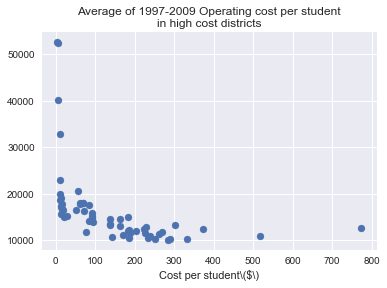

In [36]:
plt.scatter(high_cost_dists["Student_Count"],high_cost_dists["Operating_Cost_Per_Student"])
plt.xlabel("Number of students per school")
plt.xlabel("Cost per student\($\)")
plt.title("Average of 1997-2009 Operating cost per student\nin high cost districts")
plt.show()

In [37]:
high_cost_dists["Student_Count"].max()

774.1818181818181

In [38]:
clean_data[(clean_data["Student_Count"]>30000) & (clean_data["Operating_Cost_Per_Student"]>10000)]

,District_ID,County_Name,Operating_Cost_Per_Student,District_Number,School_Year,Student_Count,State_Student_Count,Total_Operating_Cost,State_Operating_Cost,State_Operating_Cost_Per_Student
1567,2180,MULTNOMAH,10050.55,Portland SD 1J,2006-07-01,46439.0,558366,466737674.5,4.768934e+09,8540.87
1568,2180,MULTNOMAH,11042.17,Portland SD 1J,2007-07-01,46363.0,561354,511948102.3,5.144637e+09,9164.69
1569,2180,MULTNOMAH,11158.41,Portland SD 1J,2008-07-01,44959.0,559271,501670741.0,5.248233e+09,9384.06
1570,2180,MULTNOMAH,11242.93,Portland SD 1J,2009-07-01,45708.0,556836,513891919.1,5.162739e+09,9271.56


In [39]:
clean_data['year'] = pd.to_datetime(clean_data['School_Year'], errors='ignore').dt.year
data_2180=clean_data[(clean_data["District_ID"]==2180)]
data_2180["year"].head()

C:\Users\Sandhya\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1558    1997
1559    1998
1560    1999
1561    2000
1562    2001
Name: year, dtype: int64

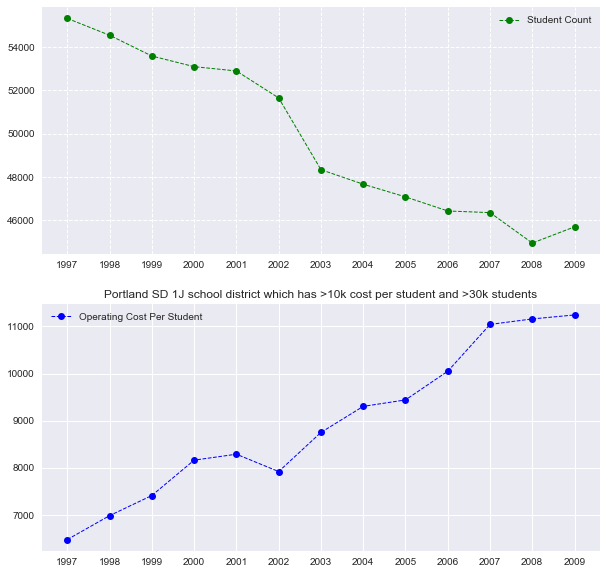

In [40]:
sns.set()
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.title("Portland SD 1J school district which has >10k cost per student and >30k students")
plt.plot(data_2180["year"],data_2180["Operating_Cost_Per_Student"],linewidth=1,linestyle="--", 
             label="Operating Cost Per Student", marker="o", color="blue" )
plt.legend()
plt.xticks(xscale)
plt.subplot(2,1,1)
plt.plot(data_2180["year"],data_2180["Student_Count"],linewidth=1,linestyle="--", 
             label="Student Count", marker="o", color="green" )

plt.xticks(xscale)
plt.legend()
plt.grid(linestyle="--")
plt.show()

In [41]:
clean_data[clean_data["Operating_Cost_Per_Student"]>50000]

,District_ID,County_Name,Operating_Cost_Per_Student,District_Number,School_Year,Student_Count,State_Student_Count,Total_Operating_Cost,State_Operating_Cost,State_Operating_Cost_Per_Student,year
449,1979,DESCHUTES,63387.33,BROTHERS SCH DIST 15,2003-07-01,3.0,549169,190162.00,3.970644e+09,7230.28,2003
450,1979,DESCHUTES,57454.33,BROTHERS SCH DIST 15,2004-07-01,3.0,549793,172363.00,4.198535e+09,7636.57,2004
768,2021,HARNEY,120444.65,Double O SD 28,2005-07-01,1.0,555146,120444.65,4.513950e+09,8131.11,2005
769,2021,HARNEY,61425.21,Double O SD 28,2006-07-01,2.0,558366,122850.41,4.768934e+09,8540.87,2006
770,2021,HARNEY,125242.63,Double O SD 28,2007-07-01,1.0,561354,125242.63,5.144637e+09,9164.69,2007
772,2021,HARNEY,62407.58,Double O SD 28,2009-07-01,2.0,556836,124815.16,5.162739e+09,9271.56,2009
925,2051,JEFFERSON,66814.28,Ashwood SD 8,2006-07-01,3.0,558366,200442.85,4.768934e+09,8540.87,2006
926,2051,JEFFERSON,73827.23,Ashwood SD 8,2007-07-01,2.0,561354,147654.46,5.144637e+09,9164.69,2007
927,2051,JEFFERSON,170210.60,Ashwood SD 8,2008-07-01,1.0,559271,170210.60,5.248233e+09,9384.06,2008
928,2051,JEFFERSON,84994.03,Ashwood SD 8,2009-07-01,2.0,556836,169988.06,5.162739e+09,9271.56,2009
